In [1]:
import pandas as pd 
from numpy import sqrt
import numpy as np 
from matplotlib import pyplot
import warnings
warnings.filterwarnings("ignore")
import itertools
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from datetime import datetime, time

In [2]:
data = pd.read_excel('Airlines+Data.xlsx')
data[:3]

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132


In [3]:
data.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [4]:
data.shape

(96, 2)

In [5]:
# checking the null values
data.isna().sum()

Month         0
Passengers    0
dtype: int64

In [6]:
# Checking the datatype of the attribute
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [7]:
data['Month'] = pd.to_datetime(data['Month'],infer_datetime_format = True)
indexedDataset = data.set_index(['Month'])
data.head(3)

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132


In [9]:
import matplotlib.pyplot as plt

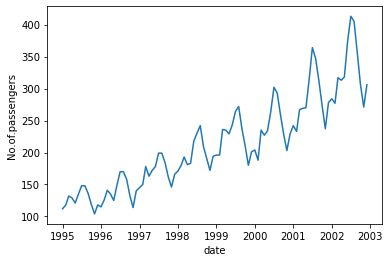

In [10]:
plt.xlabel("date")
plt.ylabel("No.of.passengers")
plt.plot(indexedDataset)

In [11]:
rolmean = indexedDataset.rolling(window=12).mean()

In [12]:
rolstd = indexedDataset.rolling(window=12).std()
print(rolmean,rolstd)

            Passengers
Month                 
1995-01-01         NaN
1995-02-01         NaN
1995-03-01         NaN
1995-04-01         NaN
1995-05-01         NaN
...                ...
2002-08-01  316.833333
2002-09-01  320.416667
2002-10-01  323.083333
2002-11-01  325.916667
2002-12-01  328.250000

[96 rows x 1 columns]             Passengers
Month                 
1995-01-01         NaN
1995-02-01         NaN
1995-03-01         NaN
1995-04-01         NaN
1995-05-01         NaN
...                ...
2002-08-01   54.530781
2002-09-01   55.586883
2002-10-01   53.899668
2002-11-01   49.692616
2002-12-01   47.861780

[96 rows x 1 columns]


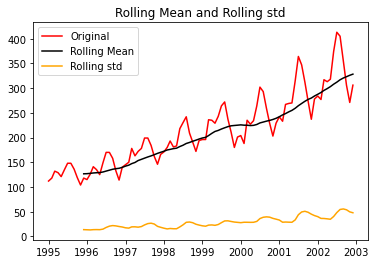

In [13]:
orig = plt.plot(indexedDataset, color='red', label = 'Original')
mean = plt.plot(rolmean, color = 'black', label = 'Rolling Mean')
std = plt.plot(rolstd, color = 'orange', label = 'Rolling std')
plt.legend(loc = 'best')
plt.title('Rolling Mean and Rolling std')
plt.show(block=False)

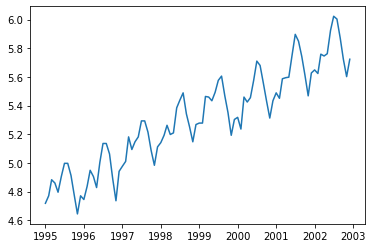

In [14]:
indexedDataset_logScale = np.log(indexedDataset)
plt.plot(indexedDataset_logScale)

In [15]:
movingAverage = indexedDataset_logScale.rolling(window=12).mean()
movingSTD = indexedDataset_logScale.rolling(window=12).std()

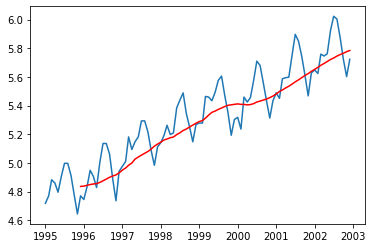

In [16]:
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage,color='red')

In [17]:
df = indexedDataset_logScale - movingAverage
df.head(4)

,Passengers
Month,
1995-01-01,NaN
1995-02-01,NaN
1995-03-01,NaN
1995-04-01,NaN


In [18]:
df.dropna(inplace = True)

In [19]:
df[:3]

,Passengers
Month,
1995-12-01,-0.065494
1996-01-01,-0.093449
1996-02-01,-0.007566


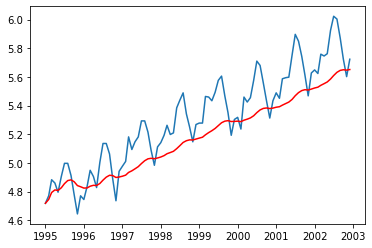

In [20]:
exponentialDecayWeightedAverage = indexedDataset_logScale.ewm(halflife=12,min_periods=0,adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage, color = 'red')

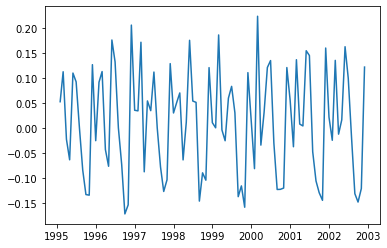

In [21]:
datasetLogScaleMinusMovingExponentDecayAverage = indexedDataset_logScale-exponentialDecayWeightedAverage
datasetLogDiffShifting = indexedDataset_logScale - indexedDataset_logScale.shift()
plt.plot(datasetLogDiffShifting)

In [22]:
datasetLogDiffShifting[:3]

,Passengers
Month,
1995-01-01,NaN
1995-02-01,0.052186
1995-03-01,0.112117


In [23]:
datasetLogDiffShifting.dropna(inplace=True)
datasetLogDiffShifting[:3]

,Passengers
Month,
1995-02-01,0.052186
1995-03-01,0.112117
1995-04-01,-0.022990


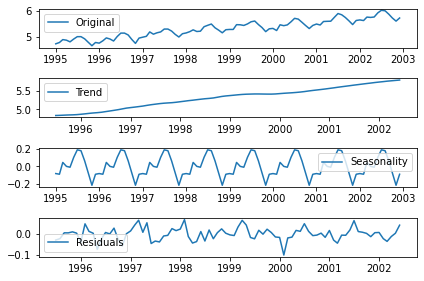

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexedDataset_logScale)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset_logScale, label = "Original")
plt.legend(loc = "best")

plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')

plt.subplot(413)
plt.plot(seasonal, label = 'Seasonality')
plt.legend(loc = 'best')

plt.subplot(414)
plt.plot(residual,label='Residuals')
plt.legend(loc = 'best')
plt.tight_layout()
decompositionLogData = residual
decompositionLogData.dropna(inplace=True)

In [25]:
from statsmodels.tsa.stattools import acf,pacf

In [26]:
acf = acf(datasetLogDiffShifting, nlags = 20)
pacf = pacf(datasetLogDiffShifting, nlags = 20, method = 'ols')

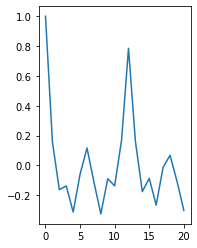

In [27]:
plt.subplot(121)
plt.plot(acf)

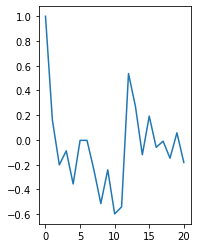

In [28]:
plt.subplot(122)
plt.plot(pacf)

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


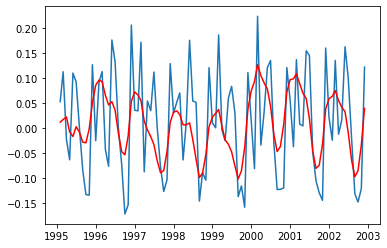

In [29]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(indexedDataset_logScale, order= (2,1,2))
results_AR = model.fit(disp = -1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color = 'red')

In [30]:
predictions_ARIMA_diff = pd.Series(results_AR. fittedvalues,copy = True)

In [31]:
predictions_ARIMA_diff

Month
1995-02-01    0.011261
1995-03-01    0.016602
1995-04-01    0.021663
1995-05-01   -0.008096
1995-06-01   -0.017395
                ...   
2002-08-01   -0.064373
2002-09-01   -0.097868
2002-10-01   -0.085680
2002-11-01   -0.033961
2002-12-01    0.038856
Length: 95, dtype: float64

In [34]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum

Month
1995-02-01    0.011261
1995-03-01    0.027863
1995-04-01    0.049526
1995-05-01    0.041430
1995-06-01    0.024035
                ...   
2002-08-01    0.954065
2002-09-01    0.856197
2002-10-01    0.770517
2002-11-01    0.736556
2002-12-01    0.775412
Length: 95, dtype: float64

In [35]:
predictions_ARIMA_log = pd.Series(indexedDataset_logScale['Passengers'].iloc[0], index = indexedDataset_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)

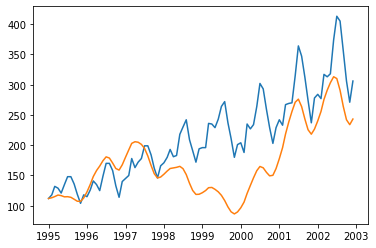

In [36]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(indexedDataset)
plt.plot(predictions_ARIMA)

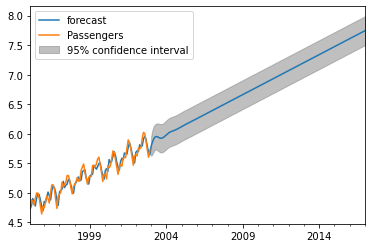

In [40]:
results_AR.plot_predict(1,264)
results = results_AR.forecast(steps = 100)

In [41]:
results[1]

array([0.08321874, 0.10431035, 0.10876001, 0.10876369, 0.11127228,
       0.11614008, 0.12022948, 0.12203081, 0.12227575, 0.12233794,
       0.12285077, 0.12357736, 0.12408717, 0.12426135, 0.12426919,
       0.12429903, 0.12439697, 0.12450385, 0.12456442, 0.12457866,
       0.12457869, 0.12458754, 0.124605  , 0.12462018, 0.12462704,
       0.124628  , 0.12462822, 0.1246301 , 0.12463279, 0.12463466,
       0.12463527, 0.12463529, 0.12463543, 0.12463585, 0.1246363 ,
       0.12463656, 0.12463663, 0.12463663, 0.12463665, 0.12463671,
       0.12463675, 0.12463677, 0.12463677, 0.12463677, 0.12463679,
       0.1246368 , 0.12463682, 0.12463682, 0.12463682, 0.12463682,
       0.12463682, 0.12463682, 0.12463682, 0.12463682, 0.12463682,
       0.12463683, 0.12463683, 0.12463683, 0.12463683, 0.12463683,
       0.12463683, 0.12463683, 0.12463683, 0.12463683, 0.12463684,
       0.12463684, 0.12463684, 0.12463684, 0.12463684, 0.12463684,
       0.12463684, 0.12463684, 0.12463684, 0.12463684, 0.12463

In [42]:
len(results[1])

100